## YouTube Data Descriptive Analysis

In [2]:
# Load pandas
import pandas as pd

In [3]:
file_name = 'game_full_videos.csv' # replace file name with your category

In [4]:
# Read CSV file into DataFrame df
df = pd.read_csv(file_name, index_col=0)

<ipython-input-4-c8a4a3dfcf04>:2: DtypeWarning: Columns (63,64,83,93,94,115,116,117,118,119,120,121,122,123,124,127,128,129,130,131,132,135,136,137,138,139,140,141,142,145,147,148,149,151,152,155,156,157,159,160,161,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, index_col=0)


In [5]:
# Load packages to build graphs
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution of videos over month and year

[Text(0, 0, '426'),
 Text(0, 0, '437'),
 Text(0, 0, '500'),
 Text(0, 0, '436'),
 Text(0, 0, '361'),
 Text(0, 0, '549'),
 Text(0, 0, '503'),
 Text(0, 0, '393'),
 Text(0, 0, '368'),
 Text(0, 0, '367'),
 Text(0, 0, '429'),
 Text(0, 0, '1562'),
 Text(0, 0, '2188')]

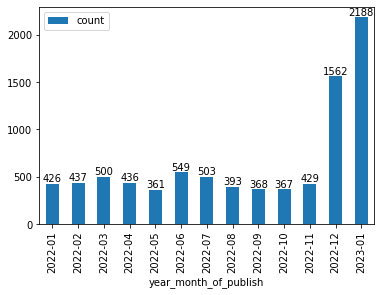

In [6]:
df['snippet.publishedAt'] = pd.to_datetime(df['snippet.publishedAt'])
df['year_month_of_publish'] = df['snippet.publishedAt'].map(lambda dt: dt.strftime('%Y-%m'))
grouped_df = df.groupby('year_month_of_publish').size().to_frame("count").reset_index()
fig = grouped_df.plot(kind='bar', x='year_month_of_publish', y='count')
fig.bar_label(fig.containers[0], label_type = 'edge')

## Distribution of the number of views

In [7]:
pd.options.display.float_format = '{:.10f}'.format # show data in actual figures instead of scientific notation

In [8]:
df_views_without_na = df[df['statistics.viewCount'].notna()] # remove na values
df_views_count = df_views_without_na['statistics.viewCount']
df_views_count.describe()

count        8518.0000000000
mean       851829.3540737262
std       3699770.9477254967
min             0.0000000000
25%         55036.2500000000
50%        134340.5000000000
75%        478382.0000000000
max     144898070.0000000000
Name: statistics.viewCount, dtype: float64

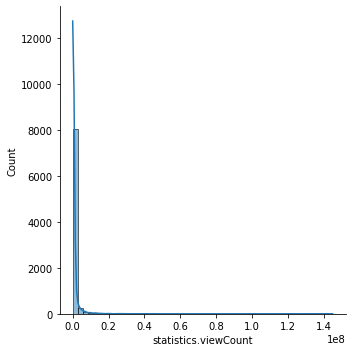

In [11]:
sns.displot(df_views_count, bins=50, kde=True)

## Distribution of the number of likes

In [12]:
df_likes_without_na = df[df['statistics.likeCount'].notna()]
df_likes_count = df_likes_without_na['statistics.likeCount']
df_likes_count.describe()

count      8323.0000000000
mean      28422.8424846810
std      122674.9546713232
min           0.0000000000
25%        1325.5000000000
50%        3903.0000000000
75%       14204.5000000000
max     4437046.0000000000
Name: statistics.likeCount, dtype: float64

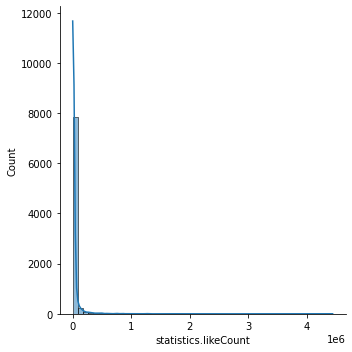

In [13]:
sns.displot(df_likes_count, bins=50, kde=True)

## Distribution of the number of comments

In [14]:
df_comments_without_na = df[df['statistics.commentCount'].notna()]
df_comments_count = df_comments_without_na['statistics.commentCount']
df_comments_count.describe()

count    8174.0000000000
mean      932.0085637387
std      3048.6922496875
min         0.0000000000
25%        63.0000000000
50%       236.0000000000
75%       746.0000000000
max     99775.0000000000
Name: statistics.commentCount, dtype: float64

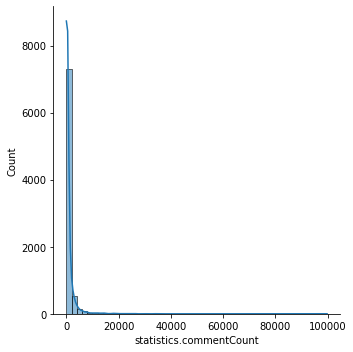

In [15]:
sns.displot(df_comments_count, bins=50, kde=True)

## Distribution of the number of tags

In [19]:
df_tags_without_na = df[df['snippet.tags'].notna()] # remove na values

In [24]:
df_tags_without_na['snippet.tags'][0] #check tags of the first video

"['DISRUPTION', 'VALORANT Episode 4', 'Episode IV', 'VALORANT trailer', 'Battlepass', 'Community Battlepass', 'Icebox', 'Yoru', 'Yoru Rework', 'Kickoff', 'VALORANT', 'VALORANT game', 'VALORANT act 2', 'Act II', 'Gaia’s Vengeance', 'New Skins', 'fps', 'shooters', 'tactical FPS', 'launch', 'VALORANT agent', 'AGENT', 'agent']"

In [25]:
eval(df_tags_without_na['snippet.tags'][0]) # should remove double quotation

['DISRUPTION',
 'VALORANT Episode 4',
 'Episode IV',
 'VALORANT trailer',
 'Battlepass',
 'Community Battlepass',
 'Icebox',
 'Yoru',
 'Yoru Rework',
 'Kickoff',
 'VALORANT',
 'VALORANT game',
 'VALORANT act 2',
 'Act II',
 'Gaia’s Vengeance',
 'New Skins',
 'fps',
 'shooters',
 'tactical FPS',
 'launch',
 'VALORANT agent',
 'AGENT',
 'agent']

In [29]:
num_tags = [len(eval(tag)) for tag in df_tags_without_na['snippet.tags']] 
df_num_tags = pd.DataFrame(num_tags)

In [30]:
df_num_tags.describe()

,0
count,7053.0000000000
mean,17.2722245853
std,11.1529823049
min,1.0000000000
25%,8.0000000000
50%,15.0000000000
75%,25.0000000000
max,81.0000000000


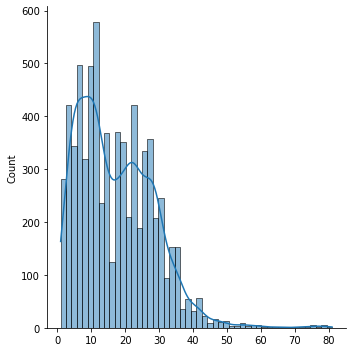

In [31]:
sns.displot(num_tags, bins=50, kde=True)

## Distribution of tags

In [34]:
video_tags = [eval(tag) for tag in df_tags_without_na['snippet.tags']]

In [37]:
import itertools
all_tags = list(itertools.chain.from_iterable(video_tags)) #combine all tags together

In [38]:
from collections import Counter, OrderedDict
frequency_all_tags = Counter(all_tags)       # find frequency for each tag
ordered_frequency_all_tags = OrderedDict(frequency_all_tags.most_common()) #order the frequency of tags

In [39]:
# find top 20 tags with most frequency, you can adjust the number of N
# Initialize N
N = 20

# Sort the dictionary by value using a lambda function to extract the values
# and then reverse the sort to get the largest values first
res = dict(sorted(frequency_all_tags.items(), key = lambda x: x[1], reverse = True)[:N])
   
# printing result
print("The top 20 value tags are  " + str(res)) 

The top 20 value tags are  {'gameplay': 779, 'game': 670, 'nintendo': 631, 'video game': 596, 'action': 592, 'nintendo switch': 580, 'fun': 560, 'adventure': 558, 'switch': 556, 'rpg': 510, 'play': 483, 'trailer': 361, 'Xbox': 319, 'Xbox Series X': 280, 'gaming': 280, 'Xbox One': 276, 'Xbox Series S': 273, 'minecraft': 257, 'launch': 242, 'Nintendo': 204}


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'gameplay'),
  Text(1, 0, 'game'),
  Text(2, 0, 'nintendo'),
  Text(3, 0, 'video game'),
  Text(4, 0, 'action'),
  Text(5, 0, 'nintendo switch'),
  Text(6, 0, 'fun'),
  Text(7, 0, 'adventure'),
  Text(8, 0, 'switch'),
  Text(9, 0, 'rpg'),
  Text(10, 0, 'play'),
  Text(11, 0, 'trailer'),
  Text(12, 0, 'Xbox'),
  Text(13, 0, 'Xbox Series X'),
  Text(14, 0, 'gaming'),
  Text(15, 0, 'Xbox One'),
  Text(16, 0, 'Xbox Series S'),
  Text(17, 0, 'minecraft'),
  Text(18, 0, 'launch'),
  Text(19, 0, 'Nintendo')])

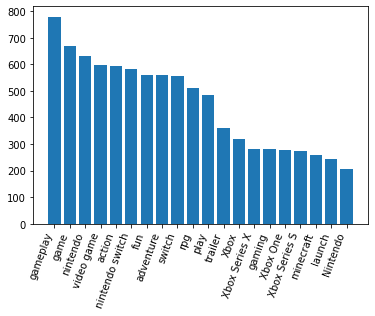

In [40]:
names = list(res.keys())
values = list(res.values())
plt.bar(range(len(res)), values, tick_label=names)
plt.xticks(rotation=70, ha='right')

## Find duration of videos

In [41]:
import re
from datetime import datetime
from datetime import timedelta

In [42]:
def parse_duration(iso_duration):
    """Parses an ISO 8601 duration string into a datetime.timedelta instance.
    Args:
        iso_duration: an ISO 8601 duration string.
    Returns:
        a datetime.timedelta instance
    """
    m = re.match(r'^P(?:(\d+)Y)?(?:(\d+)M)?(?:(\d+)D)?T(?:(\d+)H)?(?:(\d+)M)?(?:(\d+(?:.\d+)?)S)?$',
        iso_duration)
    if m is None:
        raise ValueError("invalid ISO 8601 duration string")

    days = 0
    hours = 0
    minutes = 0
    seconds = 0.0

    # Years and months are not being utilized here, as there is not enough 
    # information provided to determine which year and which month.
    # Python's time_delta class stores durations as days, seconds and
    # microseconds internally, and therefore we'd have to 
    # convert parsed years and months to specific number of days.

    if m[3]:
        days = int(m[3])
    if m[4]:
        hours = int(m[4])
    if m[5]:
        minutes = int(m[5])
    if m[6]:
        seconds = float(m[6])

    return timedelta(days=days, hours=hours, minutes=minutes, seconds=seconds)


In [43]:
parse_duration('PT10H14M11S').total_seconds() # use this function to change iso 8601 format into seconds

36851.0

In [46]:
df['contentDetails.duration'].isna().sum() #check whether there are na values

0

In [47]:
video_durations_clean = [video for video in video_durations if video != 'P0D'] #remove value 'P0D' from the list, this value will produce error for the funnction

In [48]:
video_length = []
for i in range(len(video_durations_clean)):
    duration = parse_duration(video_durations_clean[i]).total_seconds()
    video_length.append(duration)

In [49]:
df_duration = pd.DataFrame(video_length)

In [50]:
df_duration.describe()

,0
count,8512.0000000000
mean,1834.0434680451
std,5263.0221743052
min,4.0000000000
25%,61.0000000000
50%,159.5000000000
75%,880.2500000000
max,42901.0000000000


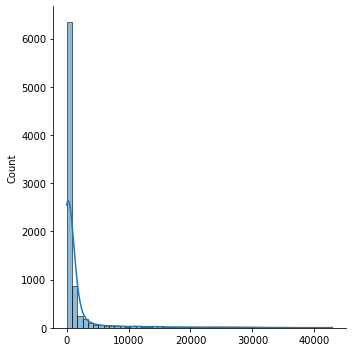

In [51]:
sns.displot(video_length, bins=50, kde=True)